In [1]:
# Import the necessary libraries

import csv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Let us look at the data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# Check for the correlation

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<p>We can see that these two data points have <code>high positive correlation</code>, and it can be inferred that they are <code>directly/linearly</code> related</p>

#### Let us plot the relation between the Hours and the Scores points

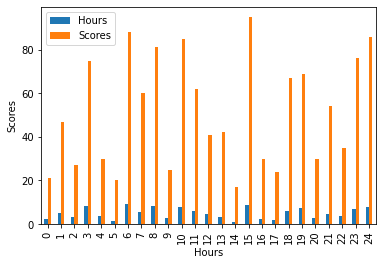

In [5]:
df.plot(kind = 'bar')

# Name the axes
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Lets us plot the scatter plot to see the direct relationship between these two points

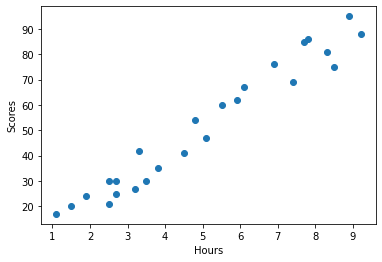

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the data points
plt.scatter(df.Hours, df.Scores)

# Name the axes
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### The scatter plot also gives a clear picture that the relationship is linear

### Model Building

In [7]:
# Import library

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [8]:
# Let define our feature variable and the target variable

X = np.asanyarray(df[['Hours']])
y = np.asanyarray(df[['Scores']])

In [9]:
# Split the data into training and testing set,

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Define a linear regressor and fit the model
regressor = LR().fit(X_train, y_train)

print("Coefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficient:  [[9.91065648]]
Intercept:  [2.01816004]


#### Fit the regression line to the data points

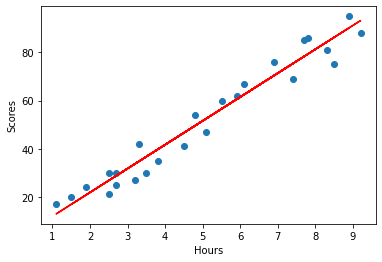

In [11]:
# Plot the data points
plt.scatter(df.Hours, df.Scores)

# Plot the fitted line
plt.plot(df.Hours, df.Hours * regressor.coef_[0] + regressor.intercept_, 'red')

# Name the axes
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

### Prediction

In [12]:
# predict the labels using the testing data
y_pred = regressor.predict(X_test)

# Compare the result
y_test, y_pred

(array([[20],
        [27],
        [69],
        [30],
        [62]], dtype=int64),
 array([[16.88414476],
        [33.73226078],
        [75.357018  ],
        [26.79480124],
        [60.49103328]]))

#### Model Evaluation

In [13]:
# Let us look at the metrics

print("Mean Absolute Error: %.4f" % np.mean(np.absolute(y_pred - y_test)))
print("Mean Squared Error: %.4f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.4f" % r2_score(y_pred, y_test))

Mean Absolute Error: 4.1839
Mean Squared Error: 21.5988
R2-score: 0.9547


#### Now we can use the <code>out of sample</code> data points for the prediction.

### Prediction on the Given Point

In [14]:
hours = 9.25

# Predict the score
score = regressor.predict([[hours]])

print("Number of Hours: ", hours)
print("Preducted Score: ", score[0][0])

Number of Hours:  9.25
Preducted Score:  93.69173248737535


#### Let us look at the original data to see the scores for the hours greater than 8.5

In [15]:
df[df['Hours'] > 8.5]

,Hours,Scores
6,9.2,88
15,8.9,95


#### This confirms that the prediction is in accordance to the original data